# Adding a new dataset

In [7]:
# We'll suppress warnings because both altair and sklearn are
# emitting lots of them, and they're annoying in a demo setting.

import warnings
warnings.filterwarnings("ignore")

import altair as alt
# Ask Altair to produce output that works on Jupyter Notebook
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [1]:
import fairness
import fairness.benchmark
import fairness.preprocess

Available algorithms:
  SVM
  GaussianNB
  LR
  DecisionTree
  Kamishima
  Calders
  ZafarBaseline
  ZafarFairness
  ZafarAccuracy
  Kamishima-accuracy
  Kamishima-DIavgall
  Feldman-SVM
  Feldman-GaussianNB
  Feldman-LR
  Feldman-DecisionTree
  Feldman-SVM-DIavgall
  Feldman-SVM-accuracy
  Feldman-GaussianNB-DIavgall
  Feldman-GaussianNB-accuracy


In [2]:
from fairness.data.objects.Data import Data

#class Ricci(Data):
#
#    def __init__(self):
#        Data.__init__(self)
#        self.dataset_name = 'ricci'
#        # Class attribute will not be created until data_specific_processing is run.
#        self.class_attr = 'Class'
#        self.positive_class_val = 1
#        self.sensitive_attrs = ['Race'] 
#        self.privileged_class_names = ['W']
#        self.categorical_features = [ 'Position' ]
#        self.features_to_keep = [ 'Position', 'Oral', 'Written', 'Race', 'Combine' ]
#        self.missing_val_indicators = []
#
#    def data_specific_processing(self, dataframe):
#        dataframe['Class'] = dataframe.apply(passing_grade, axis=1)
#        return dataframe
#
#    def handle_missing_data(self, dataframe):
#        return dataframe

# See https://archive.ics.uci.edu/ml/datasets/heart+Disease

class HeartDisease(Data):
    def __init__(self):
        Data.__init__(self)
        self.dataset_name = 'heart-disease'
        self.class_attr = 'num'
        self.positive_class_val = 1
        self.sensitive_attrs = ['sex']
        self.privileged_class_names = [1]
        self.categorical_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
        self.features_to_keep = [
            'age','sex','cp','trestbps','chol','fbs',
            'restecg','thalach','exang','oldpeak','slope','ca','thal','num']
        self.missing_val_indicators = []

    def get_raw_filename(self):
        return "./heart-disease-processed.csv"

fairness.add_dataset(HeartDisease())

In [3]:
fairness.preprocess.prepare_data(["heart-disease"])

--- Processing dataset: heart-disease ---

-------------------
Balance statistics:

Class:
num
0    160
1    137
dtype: int64

Sensitive Attribute:
sex
0     96
1    201
dtype: int64




Writing data to: /home/cscheid/code/fairness/fairness-venv/lib/python3.6/site-packages/fairness/data/preprocessed/heart-disease_original.csv
Writing data to: /home/cscheid/code/fairness/fairness-venv/lib/python3.6/site-packages/fairness/data/preprocessed/heart-disease_numerical.csv
Writing data to: /home/cscheid/code/fairness/fairness-venv/lib/python3.6/site-packages/fairness/data/preprocessed/heart-disease_numerical-binsensitive.csv
Writing data to: /home/cscheid/code/fairness/fairness-venv/lib/python3.6/site-packages/fairness/data/preprocessed/heart-disease_categorical-binsensitive.csv


In [34]:
fairness.benchmark.run(algorithm=["SVM", "DecisionTree", "ZafarFairness", "Feldman-DecisionTree", "Feldman-SVM"], 
                       dataset=["heart-disease"])

Datasets: '['heart-disease']'

Evaluating dataset:heart-disease
Sensitive attribute:sex
    Algorithm: SVM
       supported types: {'numerical-binsensitive', 'numerical'}
    Algorithm: DecisionTree
       supported types: {'numerical-binsensitive', 'numerical'}
    Algorithm: ZafarFairness
       supported types: {'numerical-binsensitive'}
    Algorithm: Feldman-SVM
       supported types: {'numerical-binsensitive', 'numerical'}
    Algorithm: Feldman-DecisionTree
       supported types: {'numerical-binsensitive', 'numerical'}
Results written to:
    /home/cscheid/.fairness/results/heart-disease_sex_numerical-binsensitive.csv
    /home/cscheid/.fairness/results/heart-disease_sex_numerical.csv


In [35]:
hd = fairness.get_dataset_by_name("heart-disease").get_results_data_frame("sex", "numerical-binsensitive")
# So many measures!
list(hd.columns.values)

['algorithm',
 'params',
 'run-id',
 '0-FNR',
 '0-FNR_over_1-FNR',
 '0-FPR',
 '0-FPR_over_1-FPR',
 '0-TNR',
 '0-TNR_over_1-TNR',
 '0-TPR',
 '0-TPR_over_1-TPR',
 '0-accuracy',
 '0-accuracy_over_1-accuracy',
 '0-calibration+',
 '0-calibration+_over_1-calibration+',
 '0-calibration-',
 '0-calibration-_over_1-calibration-',
 '1-FNR',
 '1-FPR',
 '1-TNR',
 '1-TPR',
 '1-accuracy',
 '1-calibration+',
 '1-calibration-',
 'BCR',
 'CV',
 'DIavgall',
 'DIbinary',
 'MCC',
 'TNR',
 'TPR',
 'accuracy',
 'diff:1-FNRto0-FNR',
 'diff:1-FPRto0-FPR',
 'diff:1-TNRto0-TNR',
 'diff:1-TPRto0-TPR',
 'diff:1-accuracyto0-accuracy',
 'diff:1-calibration+to0-calibration+',
 'diff:1-calibration-to0-calibration-',
 'sex-FNR',
 'sex-FNRDiff',
 'sex-FNRRatio',
 'sex-FPR',
 'sex-FPRDiff',
 'sex-FPRRatio',
 'sex-TNR',
 'sex-TNRDiff',
 'sex-TNRRatio',
 'sex-TPR',
 'sex-TPRDiff',
 'sex-TPRRatio',
 'sex-accuracy',
 'sex-accuracyDiff',
 'sex-accuracyRatio',
 'sex-calibration+',
 'sex-calibration+Diff',
 'sex-calibration+Rat

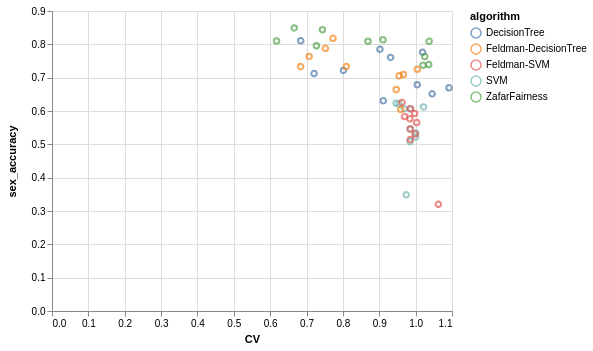

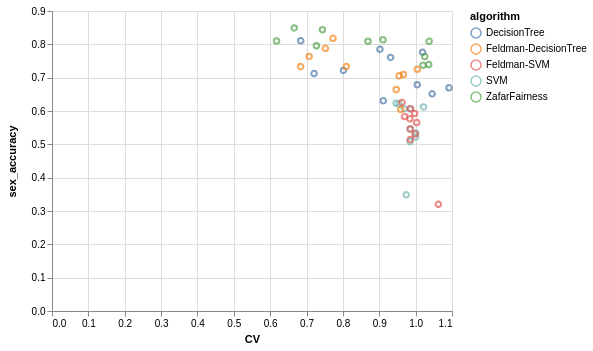

In [38]:
hd["sex_accuracy"] = hd["sex-accuracy"]

alt.Chart(hd).mark_point().encode(
    x='CV',
    y='sex_accuracy',
    color='algorithm'
)